In [462]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas import DataFrame,Series
from  matplotlib import font_manager,rc
rc('font',family='AppleGothic')

att = pd.read_csv('Attrition.csv')

In [3]:
att.isnull().sum() # null값 확인

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [637]:
att_yes = att[att['Attrition']=='Yes']
att_no = att[att['Attrition']=='No']

# 퇴사 여부 수치 명목형
# 0 : 퇴사X , 1 : 퇴사
target = att.iloc[:,1].map({'No':0,'Yes':1}) 
target

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [5]:
target.value_counts().index

Int64Index([0, 1], dtype='int64')

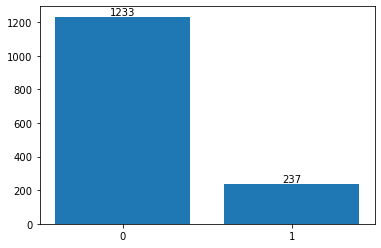

In [6]:
# 퇴사자 인원수

import matplotlib.pyplot as plt

plt.bar(target.value_counts().index,target.value_counts())
plt.xticks(target.value_counts().index)
for i, v in enumerate(target.value_counts().index):
    plt.text(v,target.value_counts()[i],target.value_counts()[i],
             fontsize = 10,
             color = 'black',
             horizontalalignment='center',
             verticalalignment='bottom')

<BarContainer object of 2 artists>

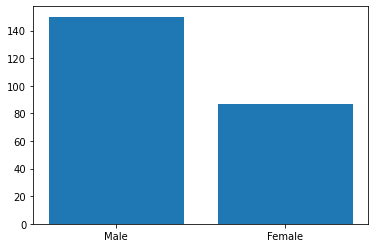

In [7]:
# 성별에 따른 퇴사자

att[att['Attrition']=='Yes']['Gender'].value_counts()
plt.bar(att[att['Attrition']=='Yes']['Gender'].value_counts().index,att[att['Attrition']=='Yes']['Gender'].value_counts())

In [8]:
att['Age'].describe()

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

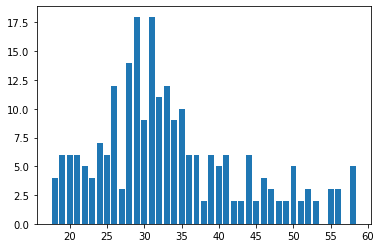

In [82]:
# 나이에 따른 퇴사자 인원수

plt.bar(att[att['Attrition']=='Yes']['Age'].value_counts().index,att[att['Attrition']=='Yes']['Age'].value_counts())
plt.show()

In [77]:
# 리인덱싱해서 인덱스를 0부터 시작하게 하면? 아니네
# 이건 그래프 말고 박스플롯이나 수치형 자료로 나타내자
# 퇴사자와 안 퇴사자 수치 비교(평균,중간값 등등) ex) 박스플롯

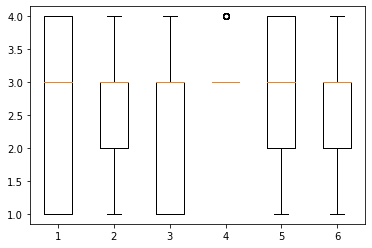

3    200
4     37
Name: PerformanceRating, dtype: int64
3    1044
4     189
Name: PerformanceRating, dtype: int64


In [81]:
# 만족도 이상치 확인
x = att[att['Attrition']=='Yes'][['EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','PerformanceRating','RelationshipSatisfaction','WorkLifeBalance']].reset_index(drop=True)

y = att[att['Attrition']=='No'][['EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','PerformanceRating']].reset_index(drop=True)

plt.boxplot(x)
plt.show()

x1 = att[att['Attrition']=='Yes']['PerformanceRating']
x2 = att[att['Attrition']=='No']['PerformanceRating']

print(x1.value_counts())
print(x2.value_counts())

# 업무 성과는 3,4 점만 있어서 제외

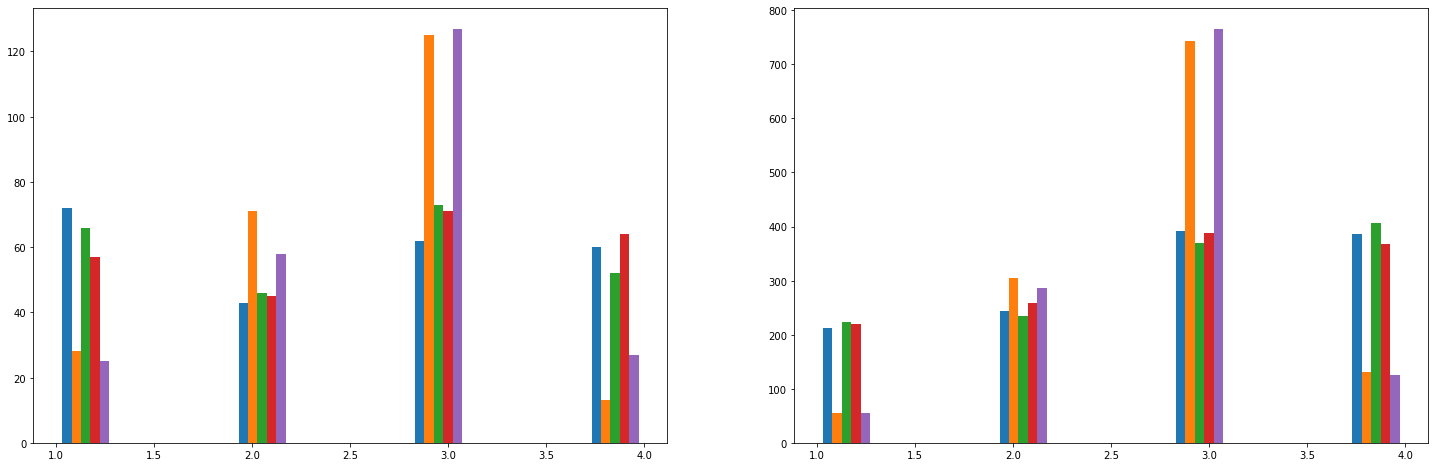

In [133]:
att_y = att[att['Attrition']=='Yes'][['EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','RelationshipSatisfaction','WorkLifeBalance']].reset_index(drop=True)
att_n = att[att['Attrition']=='No'][['EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','RelationshipSatisfaction','WorkLifeBalance']].reset_index(drop=True)

fig = plt.figure(figsize=(25,8))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.hist(att_y,label=[['EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','RelationshipSatisfaction','WorkLifeBalance']])
ax2.hist(att_n,label=[['EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','RelationshipSatisfaction','WorkLifeBalance']])
plt.show()

# 전체적인 만족도 측면에서는 큰 차이가 없다

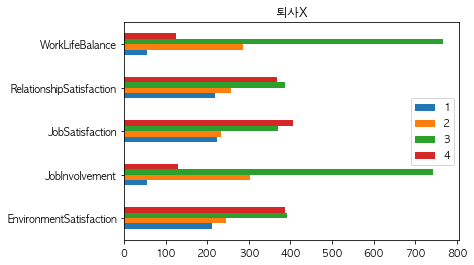

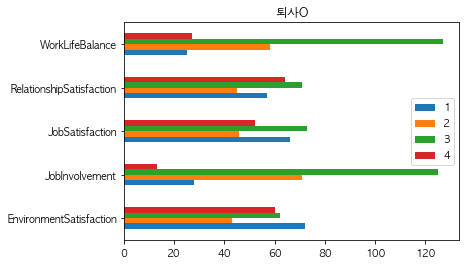

In [631]:
es = att_y['EnvironmentSatisfaction'].value_counts()
es.sort_index(inplace=True)

ji = att_y['JobInvolvement'].value_counts()
ji.sort_index(inplace=True)

js = att_y['JobSatisfaction'].value_counts()
js.sort_index(inplace=True)

rs = att_y['RelationshipSatisfaction'].value_counts()
rs.sort_index(inplace=True)

wb = att_y['WorkLifeBalance'].value_counts()
wb.sort_index(inplace=True)

att_yes_sat = pd.concat([es,ji,js,rs,wb],axis=1).T


es = att_n['EnvironmentSatisfaction'].value_counts()
es.sort_index(inplace=True)

ji = att_n['JobInvolvement'].value_counts()
ji.sort_index(inplace=True)

js = att_n['JobSatisfaction'].value_counts()
js.sort_index(inplace=True)

rs = att_n['RelationshipSatisfaction'].value_counts()
rs.sort_index(inplace=True)

wb = att_n['WorkLifeBalance'].value_counts()
wb.sort_index(inplace=True)

att_no_sat = pd.concat([es,ji,js,rs,wb],axis=1).T

att_no_sat.plot(kind='barh',title='퇴사X')
att_yes_sat.plot(kind='barh',title='퇴사O')
plt.show()
# 인원수 말고 비율로 정해서 그래프 그리기

Text(0.5, 1.0, 'WorkLifeBalance')

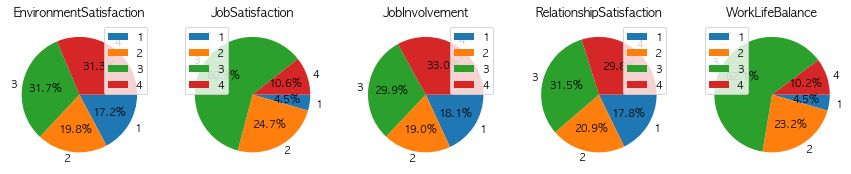

In [634]:
# 만족도 점수 분포 비율

prop_att_no_sat = att_no_sat / len(att[att['Attrition']=='No']) 
prop_att_no_sat

fig = plt.figure(figsize=(15,20))
ax1 = fig.add_subplot(1,5,1)
ax1.pie(prop_att_no_sat.iloc[0,0:5],labels=prop_att_no_sat.columns,
       autopct='%.1f%%',startangle=0,counterclock=False)
ax1.legend(labels=prop_att_no_sat.columns)
ax1.set_title('EnvironmentSatisfaction')

ax2 = fig.add_subplot(1,5,2)
ax2.pie(prop_att_no_sat.iloc[1,0:5],labels=prop_att_no_sat.columns,
       autopct='%.1f%%',startangle=0,counterclock=False)
ax2.legend(labels=prop_att_no_sat.columns)
ax2.set_title('JobSatisfaction')

ax3 = fig.add_subplot(1,5,3)
ax3.pie(prop_att_no_sat.iloc[2,0:5],labels=prop_att_no_sat.columns,
       autopct='%.1f%%',startangle=0,counterclock=False)
ax3.legend(labels=prop_att_no_sat.columns)
ax3.set_title('JobInvolvement')

ax4 = fig.add_subplot(1,5,4)
ax4.pie(prop_att_no_sat.iloc[3,0:5],labels=prop_att_no_sat.columns,
       autopct='%.1f%%',startangle=0,counterclock=False)
ax4.legend(labels=prop_att_no_sat.columns)
ax4.set_title('RelationshipSatisfaction')

ax5 = fig.add_subplot(1,5,5)
ax5.pie(prop_att_no_sat.iloc[4,0:5],labels=prop_att_no_sat.columns,
       autopct='%.1f%%',startangle=0,counterclock=False)
ax5.legend(labels=prop_att_no_sat.columns)
ax5.set_title('WorkLifeBalance')

# 퇴사 하지 않은 사원들의 만족도 비율

/var/folders/ch/sf94mhf50dv500n9ggwpgrm00000gn/T/ipykernel_711/436289057.py:18: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax3.pie(prop_att_yes_sat.iloc[2,0:5],labels=prop_att_yes_sat.columns,
/var/folders/ch/sf94mhf50dv500n9ggwpgrm00000gn/T/ipykernel_711/436289057.py:30: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax5.pie(prop_att_yes_sat.iloc[4,0:5],labels=prop_att_yes_sat.columns,


Text(0.5, 1.0, 'WorkLifeBalance')

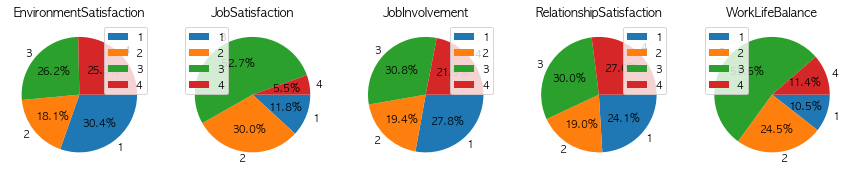

In [635]:
prop_att_yes_sat = att_yes_sat / len(att[att['Attrition']=='Yes']) 
prop_att_yes_sat

fig = plt.figure(figsize=(15,20))
ax1 = fig.add_subplot(1,5,1)
ax1.pie(prop_att_yes_sat.iloc[0,0:5],labels=prop_att_yes_sat.columns,
       autopct='%.1f%%',startangle=0,counterclock=False)
ax1.legend(labels=prop_att_yes_sat.columns)
ax1.set_title('EnvironmentSatisfaction')

ax2 = fig.add_subplot(1,5,2)
ax2.pie(prop_att_yes_sat.iloc[1,0:5],labels=prop_att_yes_sat.columns,
       autopct='%.1f%%',startangle=0,counterclock=False)
ax2.legend(labels=prop_att_yes_sat.columns)
ax2.set_title('JobSatisfaction')

ax3 = fig.add_subplot(1,5,3)
ax3.pie(prop_att_yes_sat.iloc[2,0:5],labels=prop_att_yes_sat.columns,
       autopct='%.1f%%',startangle=0,counterclock=False)
ax3.legend(labels=prop_att_yes_sat.columns)
ax3.set_title('JobInvolvement')

ax4 = fig.add_subplot(1,5,4)
ax4.pie(prop_att_yes_sat.iloc[3,0:5],labels=prop_att_yes_sat.columns,
       autopct='%.1f%%',startangle=0,counterclock=False)
ax4.legend(labels=prop_att_yes_sat.columns)
ax4.set_title('RelationshipSatisfaction')

ax5 = fig.add_subplot(1,5,5)
ax5.pie(prop_att_yes_sat.iloc[4,0:5],labels=prop_att_yes_sat.columns,
       autopct='%.1f%%',startangle=0,counterclock=False)
ax5.legend(labels=prop_att_yes_sat.columns)
ax5.set_title('WorkLifeBalance')

# 퇴사한 사원들의 만족도 비율

/var/folders/ch/sf94mhf50dv500n9ggwpgrm00000gn/T/ipykernel_711/4033767751.py:46: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax8.pie(prop_att_yes_sat.iloc[2,0:5],labels=prop_att_yes_sat.columns,
/var/folders/ch/sf94mhf50dv500n9ggwpgrm00000gn/T/ipykernel_711/4033767751.py:58: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax10.pie(prop_att_yes_sat.iloc[4,0:5],labels=prop_att_yes_sat.columns,


Text(0.5, 1.0, 'WorkLifeBalance')

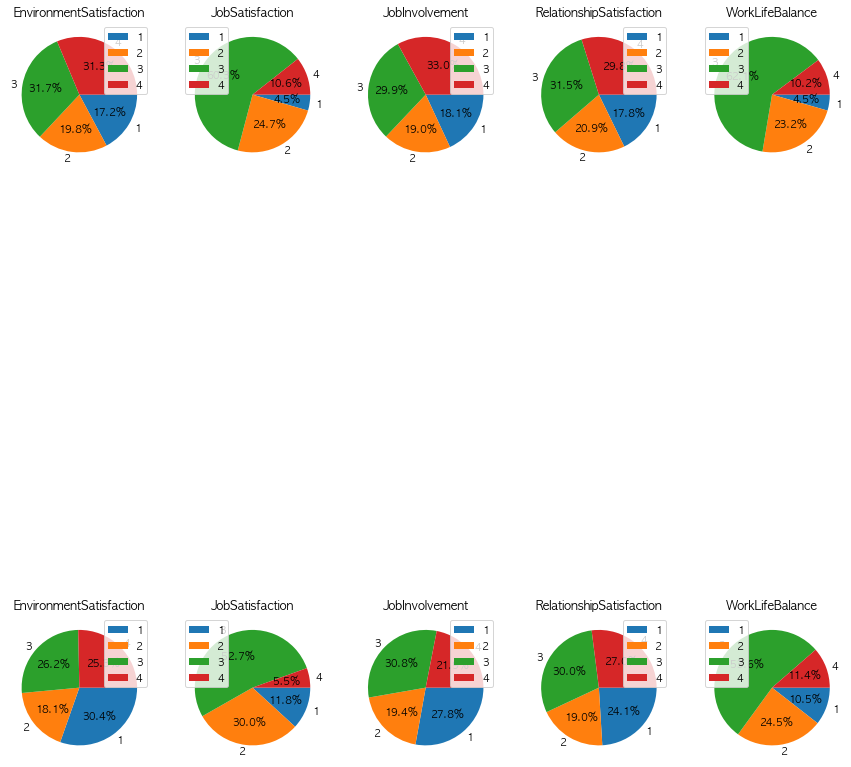

In [636]:
fig = plt.figure(figsize=(15,20))
ax1 = fig.add_subplot(2,5,1)
ax1.pie(prop_att_no_sat.iloc[0,0:5],labels=prop_att_no_sat.columns,
       autopct='%.1f%%',startangle=0,counterclock=False)
ax1.legend(labels=prop_att_no_sat.columns)
ax1.set_title('EnvironmentSatisfaction')

ax2 = fig.add_subplot(2,5,2)
ax2.pie(prop_att_no_sat.iloc[1,0:5],labels=prop_att_no_sat.columns,
       autopct='%.1f%%',startangle=0,counterclock=False)
ax2.legend(labels=prop_att_no_sat.columns)
ax2.set_title('JobSatisfaction')

ax3 = fig.add_subplot(2,5,3)
ax3.pie(prop_att_no_sat.iloc[2,0:5],labels=prop_att_no_sat.columns,
       autopct='%.1f%%',startangle=0,counterclock=False)
ax3.legend(labels=prop_att_no_sat.columns)
ax3.set_title('JobInvolvement')

ax4 = fig.add_subplot(2,5,4)
ax4.pie(prop_att_no_sat.iloc[3,0:5],labels=prop_att_no_sat.columns,
       autopct='%.1f%%',startangle=0,counterclock=False)
ax4.legend(labels=prop_att_no_sat.columns)
ax4.set_title('RelationshipSatisfaction')

ax5 = fig.add_subplot(2,5,5)
ax5.pie(prop_att_no_sat.iloc[4,0:5],labels=prop_att_no_sat.columns,
       autopct='%.1f%%',startangle=0,counterclock=False)
ax5.legend(labels=prop_att_no_sat.columns)
ax5.set_title('WorkLifeBalance')


ax6 = fig.add_subplot(2,5,6)
ax6.pie(prop_att_yes_sat.iloc[0,0:5],labels=prop_att_yes_sat.columns,
       autopct='%.1f%%',startangle=0,counterclock=False)
ax6.legend(labels=prop_att_yes_sat.columns)
ax6.set_title('EnvironmentSatisfaction')

ax7 = fig.add_subplot(2,5,7)
ax7.pie(prop_att_yes_sat.iloc[1,0:5],labels=prop_att_yes_sat.columns,
       autopct='%.1f%%',startangle=0,counterclock=False)
ax7.legend(labels=prop_att_yes_sat.columns)
ax7.set_title('JobSatisfaction')

ax8 = fig.add_subplot(2,5,8)
ax8.pie(prop_att_yes_sat.iloc[2,0:5],labels=prop_att_yes_sat.columns,
       autopct='%.1f%%',startangle=0,counterclock=False)
ax8.legend(labels=prop_att_yes_sat.columns)
ax8.set_title('JobInvolvement')

ax9 = fig.add_subplot(2,5,9)
ax9.pie(prop_att_yes_sat.iloc[3,0:5],labels=prop_att_yes_sat.columns,
       autopct='%.1f%%',startangle=0,counterclock=False)
ax9.legend(labels=prop_att_yes_sat.columns)
ax9.set_title('RelationshipSatisfaction')

ax10 = fig.add_subplot(2,5,10)
ax10.pie(prop_att_yes_sat.iloc[4,0:5],labels=prop_att_yes_sat.columns,
       autopct='%.1f%%',startangle=0,counterclock=False)
ax10.legend(labels=prop_att_yes_sat.columns)
ax10.set_title('WorkLifeBalance')

# 퇴사자들의 만족도가 더 낮다.

In [597]:
# 월소득이 평균 월 소득보다 적으면 퇴사가 많을까?

att['MonthlyIncome'].describe()

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

In [622]:
mean_income = att['MonthlyIncome'].mean() # 전체 직원의 평균 월 소득

In [640]:
att_yes_income = att[att['Attrition']=='Yes']['MonthlyIncome'] # 퇴직자 월소득
att_no_income = att[att['Attrition']=='No']['MonthlyIncome']   # 안 퇴직자 월소득

In [642]:
print(len(att_yes[att_yes_income <= mean_income])) # 퇴직자 중 전체 직원 평균 월 소득보다 월소득이 적은 직원
print(len(att_no[att_no_income <= mean_income]))   # 안 퇴직자 중 전체 직원 평균 월소득보다 월소득이 적은 직원

185
792


In [655]:
print('퇴직자 중 평균 월소득보다 월소득이 적은 비율 :',round(len(att_yes[att_yes_income <= mean_income]) / len(att_yes) * 100,2))
print('안 퇴직자 중 평균 월소득보다 월소득이 적은 비율:',round(len(att_no[att_no_income <= mean_income]) / len(att_no) * 100,2))

퇴직자 중 평균 월소득보다 월소득이 적은 비율 : 78.06
안 퇴직자 중 평균 월소득보다 월소득이 적은 비율: 64.23


In [681]:
# 퇴직 여부에 따른 월소득에 차이가 있을까?

from scipy import stats

result = stats.levene(att_yes_income,att_no_income)
print('F : %.3f \np-value : %.3f'%(result))   # 등분산 검정 완료

F : 14.900 
p-value : 0.000


In [685]:
result = stats.ttest_ind(att_yes_income,att_no_income,equal_var=False)
print('t : %.3f \np-value : %.3f'%(result))
print('t : %.3f 이고 p-value : %.3f 이므로 "퇴직 여부에 따른 월소득에 차이가 없다"는 가설기각, 따라서 "퇴직 여부에 따른 월소득에 차이가 있다'%(result))

t : -7.483 
p-value : 0.000
t : -7.483 이고 p-value : 0.000 이므로 "퇴직 여부에 따른 월소득에 차이가 없다"는 가설기각, 따라서 "퇴직 여부에 따른 월소득에 차이가 있다


In [723]:
# 결혼 여부에 따른 퇴직

len(att[(att['MaritalStatus'] == 'Single')|(att['MaritalStatus'] == 'Divorced')]) # 미혼,이혼
att_not_married = att[(att['MaritalStatus'] == 'Single')|(att['MaritalStatus'] == 'Divorced')] # 전체 미혼,이혼 직원 수
att_married = att[(att['MaritalStatus'] == 'Married')] # 전체 기혼 직원 수

In [725]:
att_not_married[att[(att['MaritalStatus'] == 'Single')|(att['MaritalStatus'] == 'Divorced')]['Attrition']=='Yes'] # 미혼,이혼 직원 중 퇴직자
att_not_married[att[(att['MaritalStatus'] == 'Single')|(att['MaritalStatus'] == 'Divorced')]['Attrition']=='No'] # 미혼,이혼 직원 중 미퇴직자

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
14,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,1,19,...,2,80,0,6,4,3,4,2,0,3
21,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,1,27,...,2,80,0,10,4,3,5,3,0,3
24,34,Yes,Travel_Rarely,699,Research & Development,6,1,Medical,1,31,...,3,80,0,8,2,3,4,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375,32,Yes,Travel_Frequently,238,Research & Development,5,2,Life Sciences,1,1939,...,1,80,0,8,2,3,4,1,0,3
1390,28,Yes,Travel_Rarely,1404,Research & Development,17,3,Technical Degree,1,1960,...,1,80,1,6,2,2,4,1,0,3
1396,53,Yes,Travel_Rarely,1168,Sales,24,4,Life Sciences,1,1968,...,2,80,0,15,2,2,2,2,2,2
1452,50,Yes,Travel_Frequently,878,Sales,1,4,Life Sciences,1,2044,...,4,80,2,12,3,3,6,3,0,1


In [766]:
import collections

i = collections.Counter(att_yes['MaritalStatus']).items()

#for k,v in i:
#    print(k,v)

list(i)[0][1] + list(i)[2][1] # 퇴직자 중 미혼,이혼 수
list(i)[1][1]                 # 퇴직자 중 기혼 수

l = collections.Counter(att_no['MaritalStatus']).items()

#for k,v in l:
#    print(k,v)

list(l)[1][1] + list(l)[2][1] # 미퇴직자 중 미혼,이혼 수
list(l)[0][1]                 # 미퇴직자 중 기혼 수

Single 120
Married 84
Divorced 33
Married 589
Single 350
Divorced 294


589

In [783]:
print('퇴직자 중 미혼,이혼 비율 :',round((list(i)[0][1] + list(i)[2][1]) / len(att_yes) * 100,2),'%')
print('퇴직자 중 기혼 비율 :',round(list(i)[1][1] / len(att_yes) * 100,2),'%')

퇴직자 중 미혼,이혼 비율 : 64.56 %
퇴직자 중 기혼 비율 : 35.44 %


In [786]:
print('미퇴직자 중 미혼,이혼 비율 :',round((list(l)[1][1] + list(l)[2][1]) / len(att_no) * 100,2),'%')
print('미퇴직자 중 기혼 비율 :',round(list(l)[0][1] / len(att_no) * 100,2),'%')

미퇴직자 중 미혼,이혼 비율 : 52.23 %
미퇴직자 중 기혼 비율 : 47.77 %
